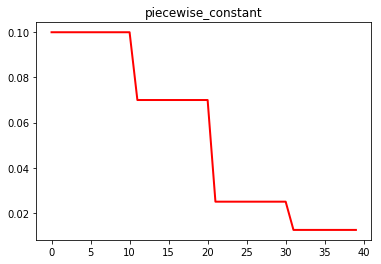

In [4]:
# piecewise_constant 阶梯式下降法
import matplotlib.pyplot as plt
import tensorflow as tf

#global_step = tf.Variable(0, name='global_step', trainable=False)
boundaries = [10, 20, 30]
learing_rates = [0.1, 0.07, 0.025, 0.0125]
y = []
N = 40
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for global_step in range(N):
        learing_rate = tf.train.piecewise_constant(global_step, boundaries=boundaries, values=learing_rates)
        lr = sess.run([learing_rate])
        y.append(lr[0])

x = range(N)
plt.plot(x, y, 'r-', linewidth=2)
plt.title('piecewise_constant')
plt.show()


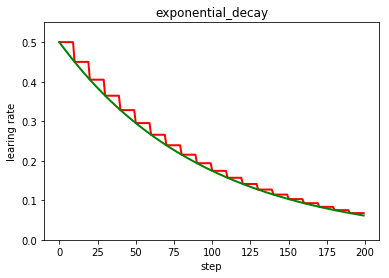

In [5]:
import matplotlib.pyplot as plt
import tensorflow as tf
#global_step = tf.Variable(0, name='global_step', trainable=False)

y = []
z = []
N = 200
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for global_step in range(N):
        # 阶梯型衰减
        learing_rate1 = tf.train.exponential_decay(
            learning_rate=0.5, global_step=global_step, decay_steps=10, decay_rate=0.9, staircase=True)
        # 标准指数型衰减
        learing_rate2 = tf.train.exponential_decay(
            learning_rate=0.5, global_step=global_step, decay_steps=10, decay_rate=0.9, staircase=False)
        lr1 = sess.run([learing_rate1])
        lr2 = sess.run([learing_rate2])
        y.append(lr1[0])
        z.append(lr2[0])

x = range(N)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_ylim([0, 0.55])
plt.plot(x, y, 'r-', linewidth=2)
plt.plot(x, z, 'g-', linewidth=2)
plt.title('exponential_decay')
ax.set_xlabel('step')
ax.set_ylabel('learing rate')
plt.show()


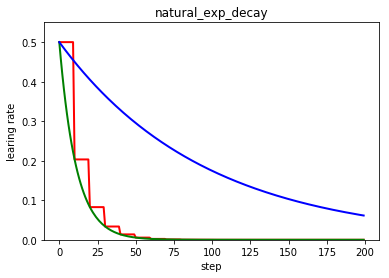

In [23]:
import matplotlib.pyplot as plt
import tensorflow as tf
#global_step = tf.Variable(0, name='global_step', trainable=False)

y = []
z = []
w = []
N = 200
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for global_step in range(N):
        
        # 阶梯型衰减
        learing_rate1 = tf.train.natural_exp_decay(
            learning_rate=0.5, global_step=global_step, decay_steps=10, decay_rate=0.9, staircase=True)
        # 标准指数型衰减
        learing_rate2 = tf.train.natural_exp_decay(
            learning_rate=0.5, global_step=global_step, decay_steps=10, decay_rate=0.9, staircase=False)
        # 指数衰减
        learing_rate3 = tf.train.exponential_decay(
            learning_rate=0.5, global_step=global_step, decay_steps=10, decay_rate=0.9, staircase=False)
        lr1 = sess.run([learing_rate1])
        lr2 = sess.run([learing_rate2])
        lr3 = sess.run([learing_rate3])
        y.append(lr1[0])
        z.append(lr2[0])
        w.append(lr3[0])

x = range(N)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_ylim([0, 0.55])
plt.plot(x, y, 'r-', linewidth=2)
plt.plot(x, z, 'g-', linewidth=2)
plt.plot(x, w, 'b-', linewidth=2)
plt.title('natural_exp_decay')
ax.set_xlabel('step')
ax.set_ylabel('learing rate')
plt.show()

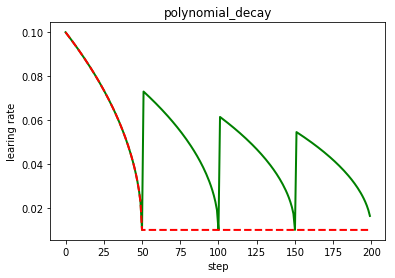

In [8]:
# 学习率下降后是否重新上升
import matplotlib.pyplot as plt
import tensorflow as tf
y = []
z = []
N = 200
#global_step = tf.Variable(0, name='global_step', trainable=False)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for global_step in range(N):
        # cycle=False
        learing_rate1 = tf.train.polynomial_decay(
            learning_rate=0.1, global_step=global_step, decay_steps=50,
            end_learning_rate=0.01, power=0.5, cycle=False)
        # cycle=True
        learing_rate2 = tf.train.polynomial_decay(
            learning_rate=0.1, global_step=global_step, decay_steps=50,
            end_learning_rate=0.01, power=0.5, cycle=True)
        lr1 = sess.run([learing_rate1])
        lr2 = sess.run([learing_rate2])
        y.append(lr1[0])
        z.append(lr2[0])

x = range(N)
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(x, z, 'g-', linewidth=2)
plt.plot(x, y, 'r--', linewidth=2)
plt.title('polynomial_decay')
ax.set_xlabel('step')
ax.set_ylabel('learing rate')
plt.show()


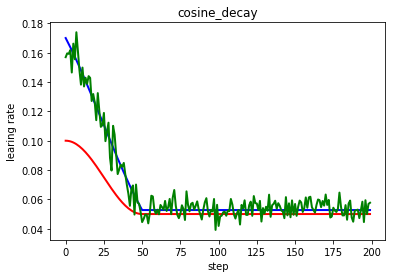

In [9]:
import matplotlib.pyplot as plt
import tensorflow as tf
y = []
z = []
w = []
N = 200
#global_step = tf.Variable(0, name='global_step', trainable=False)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for global_step in range(N):
        # 余弦衰减
        learing_rate1 = tf.train.cosine_decay(
            learning_rate=0.1, global_step=global_step, decay_steps=50,
            alpha=0.5)
        # 线性余弦衰减
        learing_rate2 = tf.train.linear_cosine_decay(
            learning_rate=0.1, global_step=global_step, decay_steps=50,
            num_periods=0.2, alpha=0.5, beta=0.2)
        # 噪声线性余弦衰减
        learing_rate3 = tf.train.noisy_linear_cosine_decay(
            learning_rate=0.1, global_step=global_step, decay_steps=50,
            initial_variance=0.01, variance_decay=0.1, num_periods=0.2, alpha=0.5, beta=0.2)
        lr1 = sess.run([learing_rate1])
        lr2 = sess.run([learing_rate2])
        lr3 = sess.run([learing_rate3])
        y.append(lr1[0])
        z.append(lr2[0])
        w.append(lr3[0])

x = range(N)
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(x, y, 'r-', linewidth=2)
plt.plot(x, z, 'b-', linewidth=2)
plt.plot(x, w, 'g-', linewidth=2)
plt.title('cosine_decay')
ax.set_xlabel('step')
ax.set_ylabel('learing rate')
plt.show()


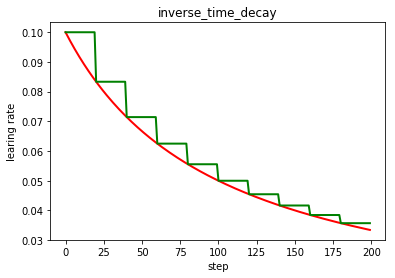

In [10]:
import matplotlib.pyplot as plt
import tensorflow as tf
y = []
z = []
N = 200
global_step = tf.Variable(0, name='global_step', trainable=False)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for global_step in range(N):
        # 阶梯型衰减
        learing_rate1 = tf.train.inverse_time_decay(
            learning_rate=0.1, global_step=global_step, decay_steps=20,
            decay_rate=0.2, staircase=True)
        # 连续型衰减
        learing_rate2 = tf.train.inverse_time_decay(
            learning_rate=0.1, global_step=global_step, decay_steps=20,
            decay_rate=0.2, staircase=False)
        lr1 = sess.run([learing_rate1])
        lr2 = sess.run([learing_rate2])

        y.append(lr1[0])
        z.append(lr2[0])

x = range(N)
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(x, z, 'r-', linewidth=2)
plt.plot(x, y, 'g-', linewidth=2)
plt.title('inverse_time_decay')
ax.set_xlabel('step')
ax.set_ylabel('learing rate')
plt.show()


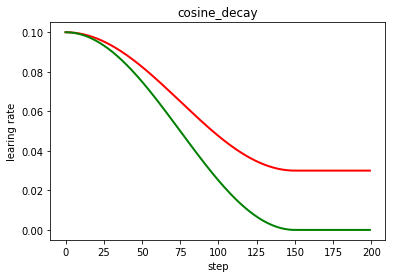

In [18]:
import matplotlib.pyplot as plt
import tensorflow as tf
y = []
z = []
N = 200
#global_step = tf.Variable(0, name='global_step', trainable=False)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for global_step in range(N):
        # 阶梯型衰减
        learing_rate1 = tf.train.cosine_decay(
            learning_rate=0.1, global_step=global_step, decay_steps=150,
            alpha=0.0)
        # 连续型衰减
        learing_rate2 = tf.train.cosine_decay(
            learning_rate=0.1, global_step=global_step, decay_steps=150,
            alpha=0.3)
        lr1 = sess.run([learing_rate1])
        lr2 = sess.run([learing_rate2])

        y.append(lr1[0])
        z.append(lr2[0])

x = range(N)
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(x, z, 'r-', linewidth=2)
plt.plot(x, y, 'g-', linewidth=2)
plt.title('cosine_decay')
ax.set_xlabel('step')
ax.set_ylabel('learing rate')
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
y = []
z = []
N = 200
#global_step = tf.Variable(0, name='global_step', trainable=False)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for global_step in range(N):
        # 阶梯型衰减
        learing_rate1 = tf.train.cosine_decay_restarts(
            learning_rate=0.1, global_step=global_step,t_mul=2.0,m_mul=0.5, alpha=0.0, first_decay_steps=100)
        # 连续型衰减
        learing_rate2 = tf.train.cosine_decay_restarts(
            learning_rate=0.1, global_step=global_step, t_mul=2.0,m_mul=1.0, alpha=0.0,first_decay_steps=100)
        lr1 = sess.run([learing_rate1])
        lr2 = sess.run([learing_rate2])

        y.append(lr1[0])
        z.append(lr2[0])

x = range(N)
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(x, y, 'r-', linewidth=2)
plt.plot(x, z, 'g-', linewidth=2)
plt.title('cosine_decay_restarts')
ax.set_xlabel('step')
ax.set_ylabel('learing rate')
plt.show()
